<h1><center>Final Assignment</center></h1>


> ***Note: Please ensure you follow the instructions outlined in the in the <a href="https://www.coursera.org/learn/supervised-machine-learning-regression/supplement/YGZt9/project-scenario">Project Scenario</a> section to complete this Final Assignment successfully.***


In [ ]:
!pip install numpy pandas matplotlib seaborn scipy scikit-learn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 35.2/35.2 MB 167.1 MB/s eta 0:00:0000:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.5/9.5 MB 163.3 MB/s eta 0:00:00


<h2>Data Summary</h2>

This notebook introduces modelling on data presenting white wine quality in dependence on its chemical composition. The data were collected in different regions of Portugal and represent a very broad research of how chemical composition of a whine can be correlated to its characteristics as "quality". While measuring of concentrations of chemical substances is a very well established technique providing good agreement between results of measurements, "quality" of wine is very subjective characteristics. For this research wine sorts were tested by professionals following a standardized methodology. This methodology assumes several steps in testing, including but not limited to pleasance of taste. The dataset does not contain the details of that test methodology, only the final grade.
From modelling perspective we see a big potential problem: the data may be not identically distributed as it must be supposed to make statistical methods valid.
First, we read the data in pandas dataframe to see what is inside:

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

data = pd.read_csv("winequality-white.csv", sep=';')
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


Quick info about the data columns:

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


It is important to see that all columns (features) in the data set are already of numeric type, moreover, representing continious data. According to the statistics there are no missed values, this is also very important for the modelling.
The target is presented as a rating from 1 to 10 where 10 is the highest possible value. The data do not contain any marks about from what expert they come, so there is no chance to test the hypothesis about identity of distributions from different experts. Let's first check whether there are wines tested several times. We assume that chemical composition defines "wine" uniquely: duplicated rows for chemical concentrations represent the same wine.

In [ ]:

data[data.drop('quality', axis=1).duplicated()]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.900000,6
5,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.100000,6
7,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.800000,6
8,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.500000,6
20,6.2,0.66,0.48,1.2,0.029,29.0,75.0,0.98920,3.33,0.39,12.800000,8
...,...,...,...,...,...,...,...,...,...,...,...,...
4828,6.4,0.23,0.35,10.3,0.042,54.0,140.0,0.99670,3.23,0.47,9.200000,5
4850,7.0,0.36,0.35,2.5,0.048,67.0,161.0,0.99146,3.05,0.56,11.100000,6
4851,6.4,0.33,0.44,8.9,0.055,52.0,164.0,0.99488,3.10,0.48,9.600000,5
4856,7.1,0.23,0.39,13.7,0.058,26.0,172.0,0.99755,2.90,0.46,9.000000,6


There are 937 rows which have duplicates. Let's compute statistics for target value for each unique wine. We group our dataset by non-target columns and compute count, mean and standard deviation for target value inside each group to see whether there is an effect of difference between experts.

In [ ]:
X_cols = [i for i in data.columns if i!='quality']
grouped_data = data.groupby(X_cols).agg(['count', 'mean', 'std'])
grouped_data[('quality', 'count')].value_counts()

(quality, count)
1    3189
2     673
3      61
4      24
5       6
6       4
7       2
8       2
Name: count, dtype: int64

So, there are 3189 wines tested only ones and 2 wines tested 8 times. In betwee is the rest. What is the variance of quality:

In [ ]:
grouped_data[('quality', 'std')].describe()

count    772.0
mean       0.0
std        0.0
min        0.0
25%        0.0
50%        0.0
75%        0.0
max        0.0
Name: (quality, std), dtype: float64

This is interesting - all wines have always the same quality score independent from how many times they were tested. This makes us sure, that we cannot say that data are not identically distributed. So, we can apply statistical analisys to the whole dataset. We keep duplicated points as they present important information about confidence in measurements.

<h2>Analysis Objectives</h2>

The main goal of our modelling will be establishing a functional dependency between given wine chemical characteristics and its quality. In terms of our dataset we will look for a function of arguments given in columns except column 'quality' and the target value in the column 'quality'. We will use Linear Regression model, but to expand our modelling power we will assume that linear dependency can be no only between target and features directly, but also between their polynomial combinations (or powers). We will analyse the following models:
* simple Linear Regression between target and features
* Linear Regression between target and Polynomial Features with power up to 4
* Regularized Linear Regression with Polynomial Features (Lasso, Rigid, ElasticNet)

<h2>Model comparison</h2>

First, we build basic linear regression over the whole dataset to establish a baseline.

In [ ]:
from sklearn.preprocessing import PowerTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

pt = PowerTransformer(method='yeo-johnson', standardize=True)
mod = LinearRegression()
steps = [('transform', pt), ('model', mod)]
pipe = Pipeline(steps=steps)


X = data[X_cols]
y=data['quality']
pipe.fit(X, y)
Y = pipe.predict(X)
R2 = r2_score(y, Y)
R2

0.27242140727822806

This is a pretty miserable result. Let's visualize our predictions against truth values together with a reference line:

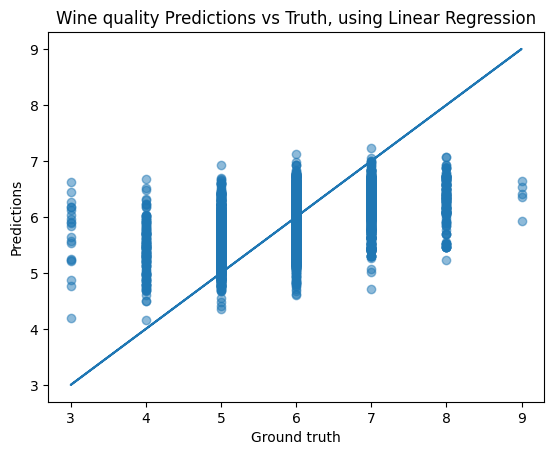

In [ ]:
ax = plt.axes()
# we are going to use y_test, y_test_pred
ax.scatter(y, Y, alpha=.5)
ax.plot(y, y) # reference line
ax.set(xlabel='Ground truth',
       ylabel='Predictions',
       title='Wine quality Predictions vs Truth, using Linear Regression');

We see a very little dependency of predicted values on the referenced ones.

Let's check how adding polynomial features affect the predictive power of linear regression. We will use polynoms of degree up to 3

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

pf = PolynomialFeatures(degree=4, include_bias=False)
X_pf = pf.fit_transform(X)
pipe.fit(X_pf, y)
Y = pipe.predict(X_pf)
R2 = r2_score(y, Y)
R2

0.6515012132463873

The R2 value is better, but not much enough. Let's look at the plot:

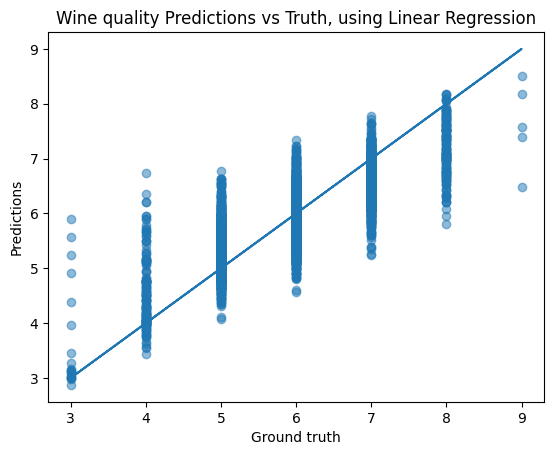

In [ ]:
ax = plt.axes()
# we are going to use y_test, y_test_pred
ax.scatter(y, Y, alpha=.5)
ax.plot(y, y) # reference line
ax.set(xlabel='Ground truth',
       ylabel='Predictions',
       title='Wine quality Predictions vs Truth, using Linear Regression');

Although we have added a very high non-linear mutual dependencies between up to 4 features we still see big variance of results which implicitely tells us that calculated coefficients are not very trustable and their estimations must include significant uncertainty. We also see big biases on ends of our target range: both values 3 and 9 are systematically far from truth.

<h2>Findings and interpretations</h2>

We started from basic overview of the provided data and made an important observations: the data present results of wine tests from different experts. The dataset doesn't contain information about what data point comes from what expert. We could only analyse the differences in scores for whines of the same chemical composition and found out that all wines were given the same score independent from how many times they were tested.

Strictly speaking this is not the same as conclude, that there is no difference in expert's scoring, but we simply do not have enough information to reject this hypothesis.

Simple linear model wich includes only dependencies to features themselves does not demonstrate acceptabe predictive quality. With R2 score only about 0.27 and big both bias and variance of predictions speaks to significant undertraining and undercomplexity of the model.

On the other hand, including polynomial combinations of features with power up to 4 shows clear improvement both in terms of R2 score - 0.65 - and for bias. Variance stays same high. This is in accordance with bias-variance trade-off principle: increasing model complexity we improve bias by better fitting our model to data.

Both models were trained on the full dataset without regularization and feature selection as this is an "extreme" regime to test whether LinearRegression can overall follow the true dependency, so we could see low bias and good R2 score. Unfortunatelly, this is not the case - even trained on full dataset LinearRegression does not catch the true function. So, there is no point to try more complicated techniques with regularization.

<h2>Evaluation and future steps</h2>

We have trained our models on whole dataset. Evaluation of models showed poor performance of both basic LinearRegression and with polynomial features up to degree 4.

We keep in mind that for future works it is essential to understand the role of different experts in scoring wine - we need more data showing what score came from what expert. If we see that their scorings are not identically distributed, we must split datasets by experts as we are not allowed to process not identically distributed data in one dataset.

Second, we see that LinearRegression model does not demonstrate promising results from the beginning. This can be caused by wrong problem interpretation: instead of regression, we may consider classification, especially keeping in mind that our data demonstrate high variance. This can be a sign that whole areas in feature space can be assigned to a single quality score. Classification is a very different machine learning technique and we need to implement it as the next step.